<a href="https://colab.research.google.com/github/AnkitWalde/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.


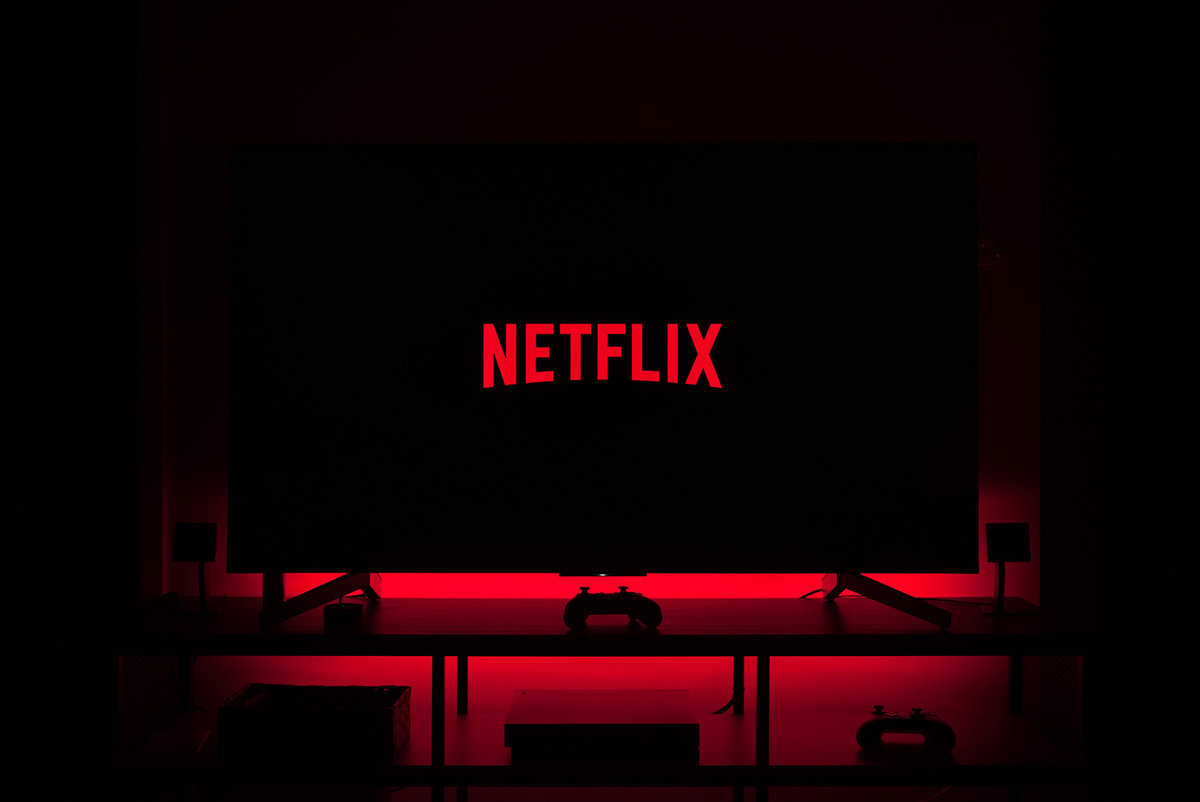

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [1]:
#Importing the  required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from numpy import math
import warnings
warnings.filterwarnings('ignore')

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE
!pip install nltk
import nltk 
!python3 -c "import nltk; nltk.download('all')"
# for named entity recognition (NER)
from nltk import ne_chunk

# vectorizers for creating the document-term-matrix (DTM)
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.decomposition import TruncatedSVD

import pylab as pl
from nltk.corpus import stopwords  #stopwords
from nltk import word_tokenize,sent_tokenize # tokenizing
from nltk.stem import PorterStemmer,LancasterStemmer  # using the Porter Stemmer and Lancaster Stemmer and others
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer  # lammatizer from WordNet

#stop-words

nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import linear_kernel
from sklearn.preprocessing import StandardScaler

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Importing the data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Loading the data
df_Netflix = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

In [4]:
#copying data to preserve orignal file
netflix = df_Netflix.copy()

In [5]:
# Checking for info
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [6]:
# Checking for unique
netflix.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

In [7]:
# Checking for columns
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [8]:
# Checking for shape
netflix.shape

(7787, 12)

In [9]:
# Checking for head top five rows
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [10]:
# Find the various statistic for all the columns
netflix.describe(include ='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


In [11]:
# Null Values
netflix.isnull()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,False,False,False,False,False,False,False,False,False,False,False,False
7783,False,False,False,False,False,False,False,False,False,False,False,False
7784,False,False,False,True,False,True,False,False,False,False,False,False
7785,False,False,False,True,False,False,False,False,False,False,False,False


In [12]:
# To show count of Null values in each column
netflix.isnull().sum() 

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

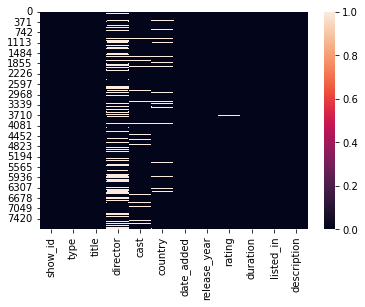

In [13]:
#using heat-map to show null values count
sns.heatmap(netflix.isnull())

In [14]:
#Counts of rating
netflix["rating"].value_counts()

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [15]:
#Counts of cast
netflix["cast"].value_counts()

David Attenborough                                                                                                                                                            18
Samuel West                                                                                                                                                                   10
Jeff Dunham                                                                                                                                                                    7
Kevin Hart                                                                                                                                                                     6
Michela Luci, Jamie Watson, Eric Peterson, Anna Claire Bartlam, Nicolas Aqui, Cory Doran, Julie Lemieux, Derek McGrath                                                         6
                                                                                                                   

In [16]:
#Counts of country
netflix["country"].value_counts()

United States                                                   2555
India                                                            923
United Kingdom                                                   397
Japan                                                            226
South Korea                                                      183
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 681, dtype: int64

In [17]:
#Replacing Null to its mode values and drop irrelevant column
netflix['rating'].replace(np.nan, 'TV-MA',inplace  = True)
netflix['country'].replace(np.nan, 'United States',inplace  = True)
netflix['cast'].replace(np.nan, 'missing info',inplace  = True)

netflix= netflix.drop(columns= ['director'],axis=1)

In [18]:
#date_added column
netflix = netflix[netflix['date_added'].notna()]

In [19]:
# Checking the null values after replaced and drop column
netflix.isnull().sum()

show_id         0
type            0
title           0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [20]:
# New Features
# Add new features
netflix["date_added"] = pd.to_datetime(netflix['date_added'])
netflix['year_added'] = netflix['date_added'].dt.year
netflix['month_added'] = netflix['date_added'].dt.month

In [21]:
#checking for head after seperating date ,month,year
netflix[["date_added","year_added","month_added"]].head()

,date_added,year_added,month_added
0,2020-08-14,2020,8
1,2016-12-23,2016,12
2,2018-12-20,2018,12
3,2017-11-16,2017,11
4,2020-01-01,2020,1


In [22]:
# Check the Duplicates entries
len(netflix[netflix.duplicated()])

0

#**Exploratory Data Analysis**

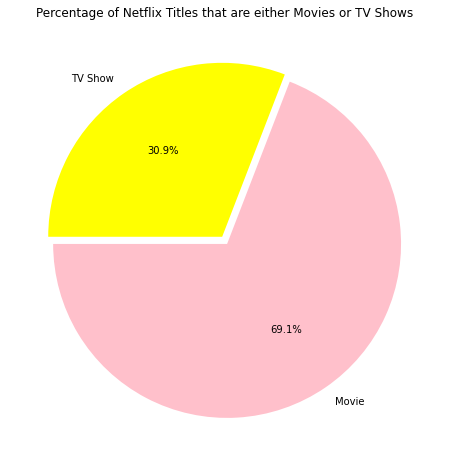

In [23]:
# Plotting the pie plot
plt.figure(figsize=(14,8))
plt.title("Percentage of Netflix Titles that are either Movies or TV Shows")
graph = plt.pie(netflix.type.value_counts(),explode=(0.025,0.025), labels=netflix.type.value_counts().index, colors=['pink','yellow'],autopct='%1.1f%%', startangle=180)
plt.show()

###**Observations** :-

###It's evident that there are more movies on Netflix than TV shows.

###Netflix has 5377 movies, which is more than double the quantity of TV shows.

###There are about 69.1% movies and 30.9% TV shows on Netflix

In [24]:
#storing type feature into individual variable name   
netflix_movies = netflix[netflix["type"]=="Movie"]
netflix_shows = netflix[netflix["type"]=="TV Show"]

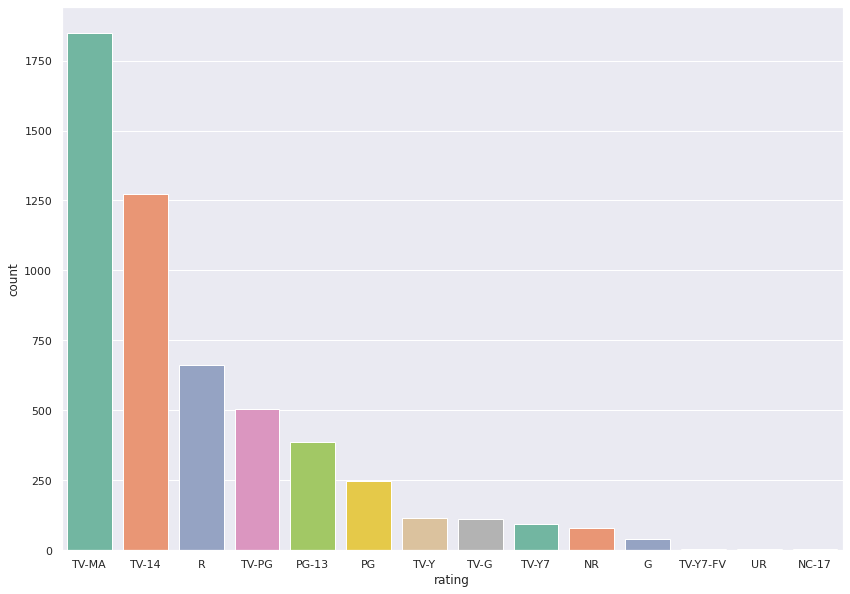

In [25]:
#Rating wise analysis
plt.figure(figsize=(14,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=netflix_movies, palette="Set2", order=netflix_movies['rating'].value_counts().index[0:15])

###**Observation**

###The largest count of movies are made with the 'TV-MA' rating."TV-MA" is a rating assigned by the TV Parental Guidelines to a television program that was designed for mature audiences only.

###Second largest is the 'TV-14' stands for content that may be inappropriate for children younger than 14 years of age.

###Third largest is the very popular 'R' rating.An R-rated film is a film that has been assessed as having material which may be unsuitable for children under the age of 17 by the Motion Picture Association of America; the MPAA writes "Under 17 requires accompanying parent or adult guardian".

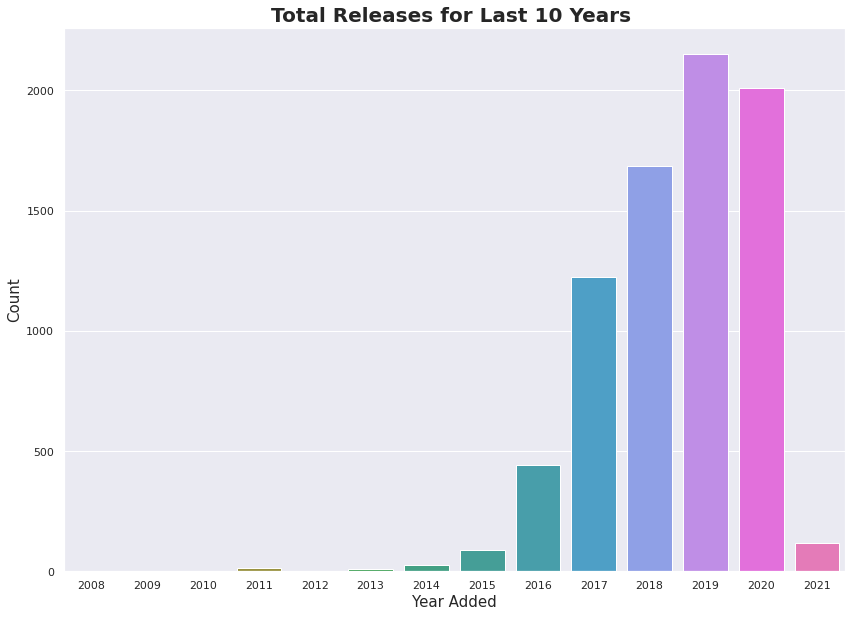

In [26]:
# Total release for last 10 years
sns.set(rc={'figure.figsize':(14,10)})
sns.countplot(x='year_added',data=netflix,palette="husl")

plt.title('Total Releases for Last 10 Years ',fontsize = 20,fontweight="bold")  
plt.xlabel('Year Added', fontsize = 15) 
plt.ylabel('Count', fontsize = 15)   
plt.show()

###The number of release have significantly increased after 2015 and have dropped in 2021 becase of Covid 19

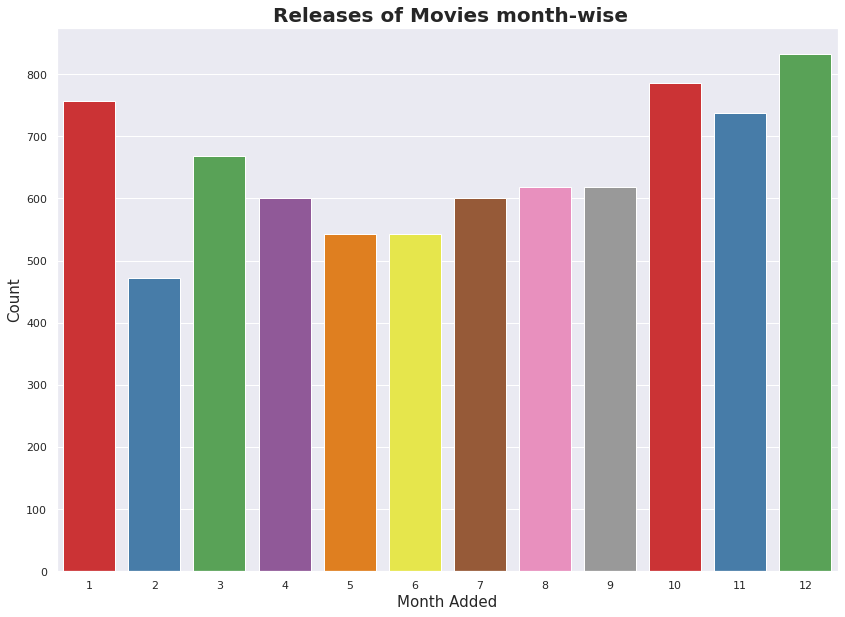

In [27]:
# Release of movies month-wise
sns.color_palette("cubehelix", as_cmap=True)
sns.set(rc={'figure.figsize':(14,10)})
sns.countplot(x='month_added',data=netflix,palette="Set1")


plt.title(' Releases of Movies month-wise',fontsize = 20,fontweight="bold")  
plt.xlabel('Month Added', fontsize = 15) 
plt.ylabel('Count', fontsize = 15)    
plt.show()

###More of the content is released in holiday season - October, November, December and January

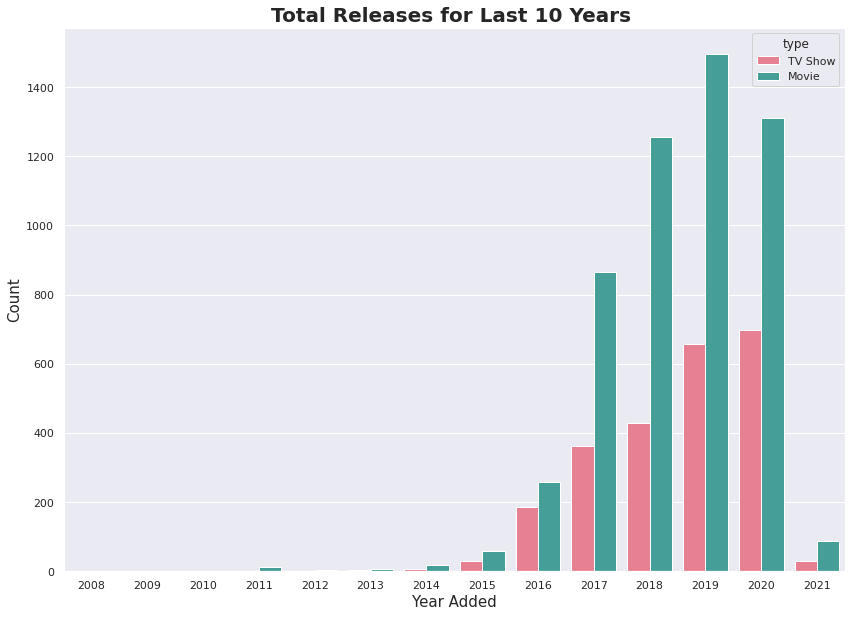

In [28]:
# Total release for last 10 years
sns.set(rc={'figure.figsize':(14,10)})
sns.countplot(x='year_added',hue='type',data=netflix,palette="husl")

plt.title('Total Releases for Last 10 Years ',fontsize = 20,fontweight="bold")  
plt.xlabel('Year Added', fontsize = 15) 
plt.ylabel('Count', fontsize = 15)   
plt.show()

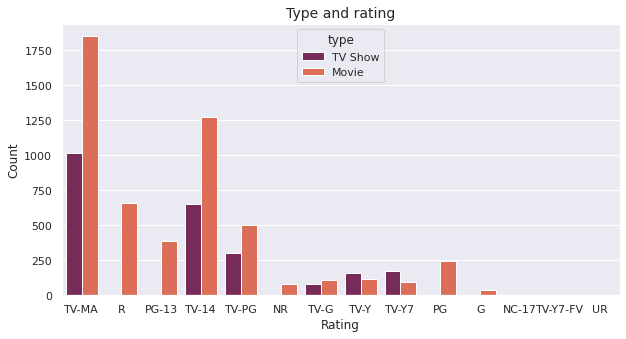

In [29]:
# Rating
plt.figure(figsize=(10,5))
sns.countplot(x='rating',hue='type',data=netflix,palette="rocket")
plt.title('Type and rating',fontsize = 14)
plt.xlabel('Rating', fontsize = 12) 
plt.ylabel('Count', fontsize = 12)  
plt.show()

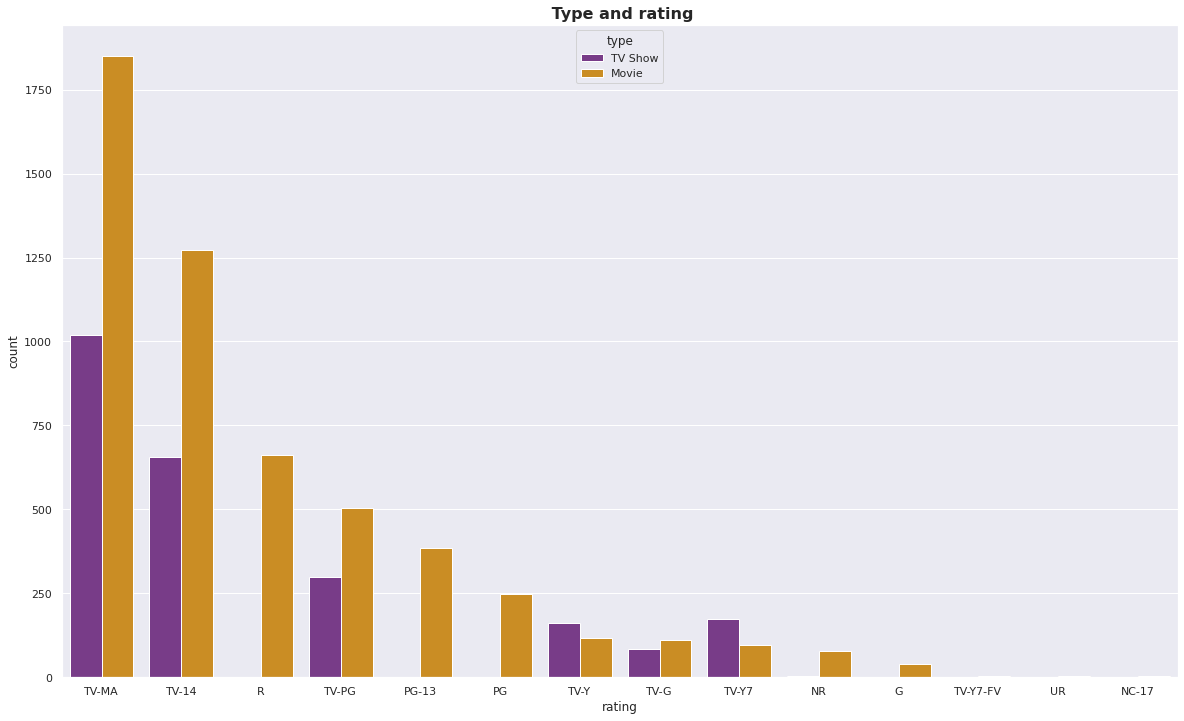

In [30]:
#Rating
plt.figure(figsize=(20,12))
sns.countplot(x='rating',hue='type',data=netflix,palette="CMRmap", order=netflix_movies['rating'].value_counts().index[0:15])
plt.title(' Type and rating',size='16',fontweight="bold")
plt.show()

In [31]:
#country wise analysis
country = netflix['country'].value_counts().reset_index()
country = country[country['country'] /  country['country'].sum() > 0.01]


fig = px.pie(country, values='country', names='index',color_discrete_sequence=px.colors.sequential.Reds)
fig.update_traces(textposition='inside', textinfo='percent+label',
                  marker = dict(line = dict(color = 'orange', width = 2)))
fig.show()

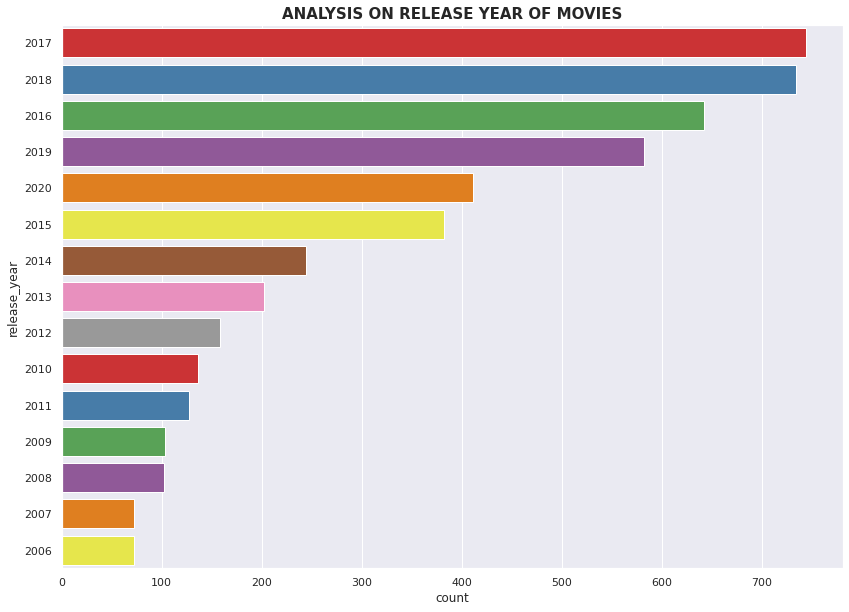

In [32]:
#Year wise analysis
plt.figure(figsize=(14,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=netflix_movies, palette="Set1", order=netflix_movies['release_year'].value_counts().index[0:15])
plt.title('ANALYSIS ON RELEASE YEAR OF MOVIES', fontsize=15, fontweight='bold')
plt.show()

###Most of the Movies were released in 2017 and 2018

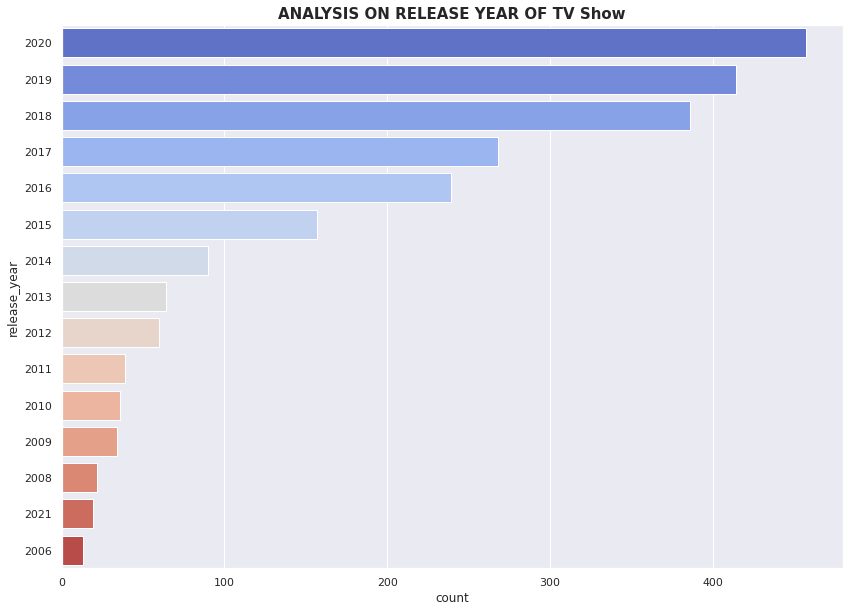

In [33]:
#ANALYSIS ON RELEASE YEAR OF TV Show
plt.figure(figsize=(14,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=netflix_shows, palette="coolwarm", order=netflix_shows['release_year'].value_counts().index[0:15])

plt.title('ANALYSIS ON RELEASE YEAR OF TV Show', fontsize=15, fontweight='bold')
plt.show()

###Most of the TV Shows were released in 2020 followed by 2019 and 2018

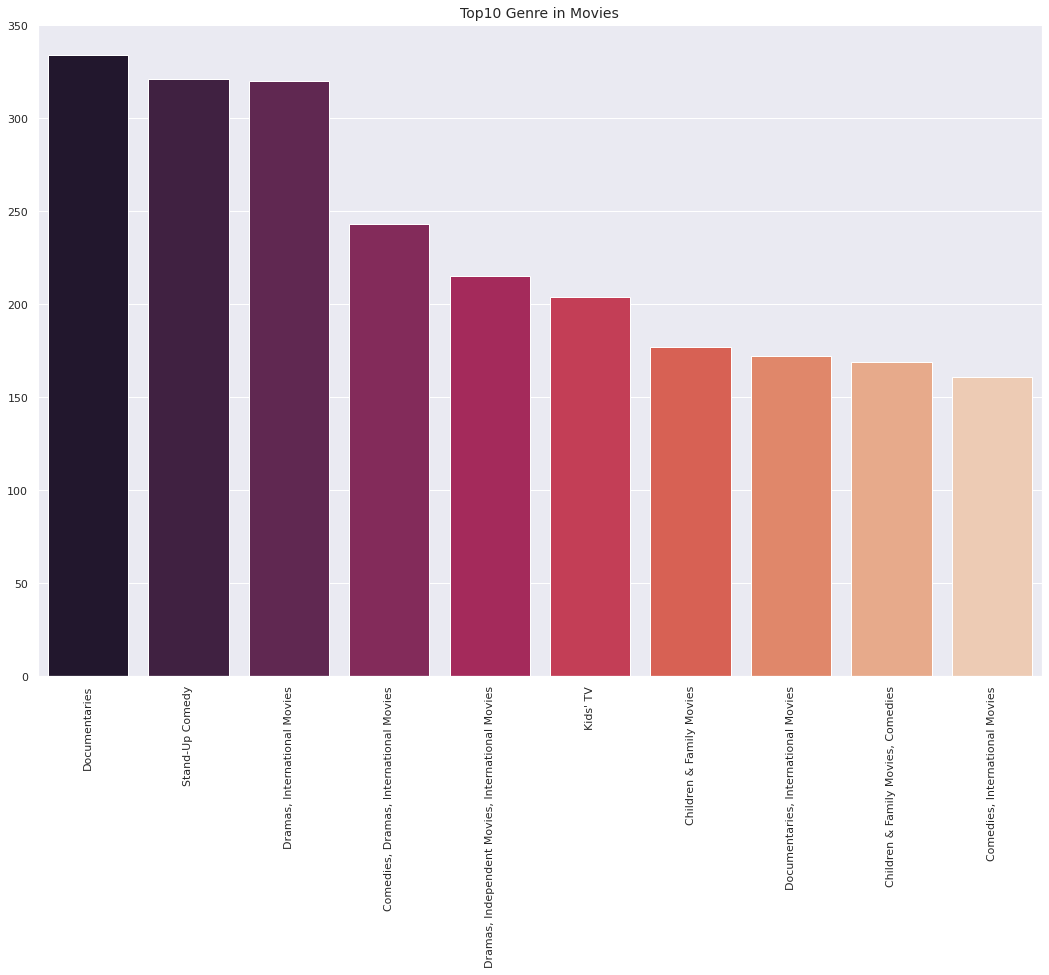

In [34]:
# Top 10 Genre in movies
plt.figure(figsize=(18,12))
sns.barplot(x = netflix["listed_in"].value_counts().head(10).index,
            y = netflix["listed_in"].value_counts().head(10).values,palette="rocket")
plt.xticks(rotation=90)
plt.title("Top10 Genre in Movies",fontsize = 14)
plt.show()

### From the graph, we know that Documentaries take the first place, followed by Stand-up Comedy and Dramas,International Movies

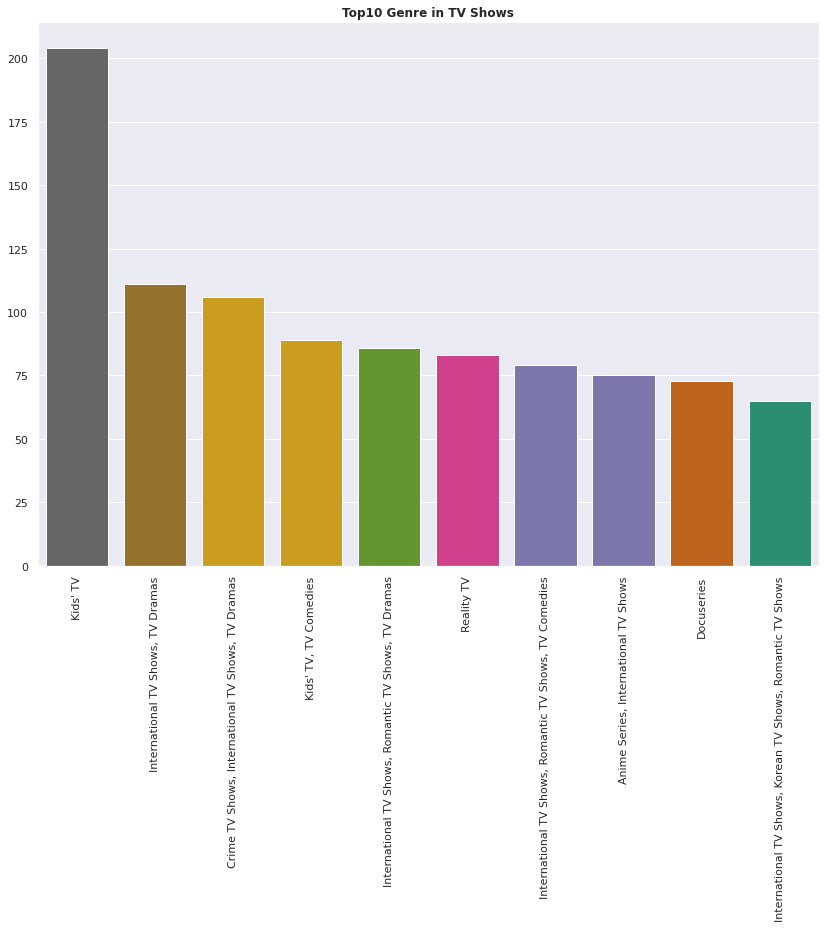

In [35]:
#Top10 Genre in TV Shows
plt.figure(figsize=(14,10))
sns.barplot(x = netflix_shows["listed_in"].value_counts().head(10).index,
            y = netflix_shows["listed_in"].value_counts().head(10).values,palette="Dark2_r")
plt.xticks(rotation=90)
plt.title("Top10 Genre in TV Shows",fontweight="bold")
plt.show()

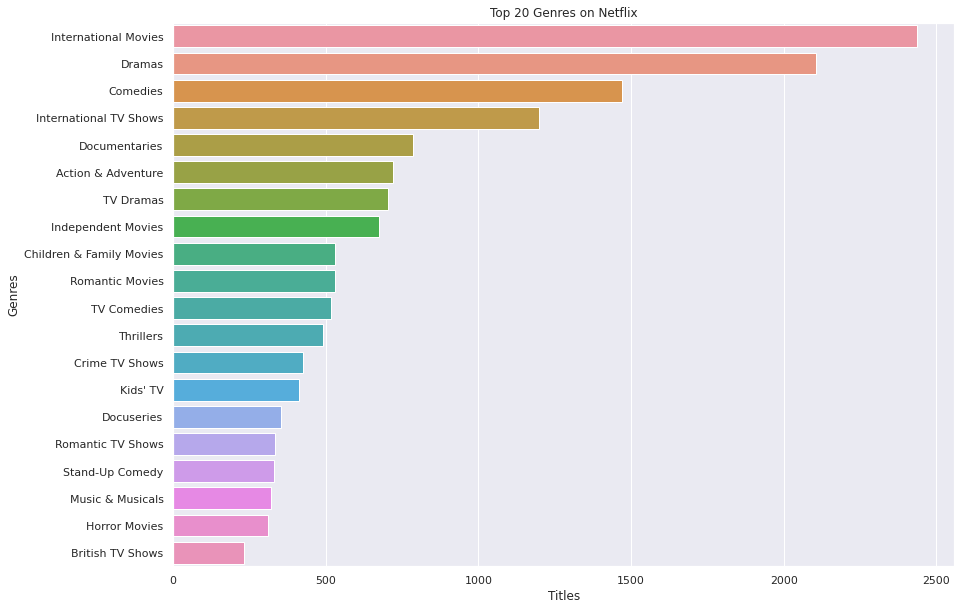

In [36]:
#Top 20 Genres on Netflix
filtered_genres = netflix.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
plt.figure(figsize=(14,10))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:20])
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

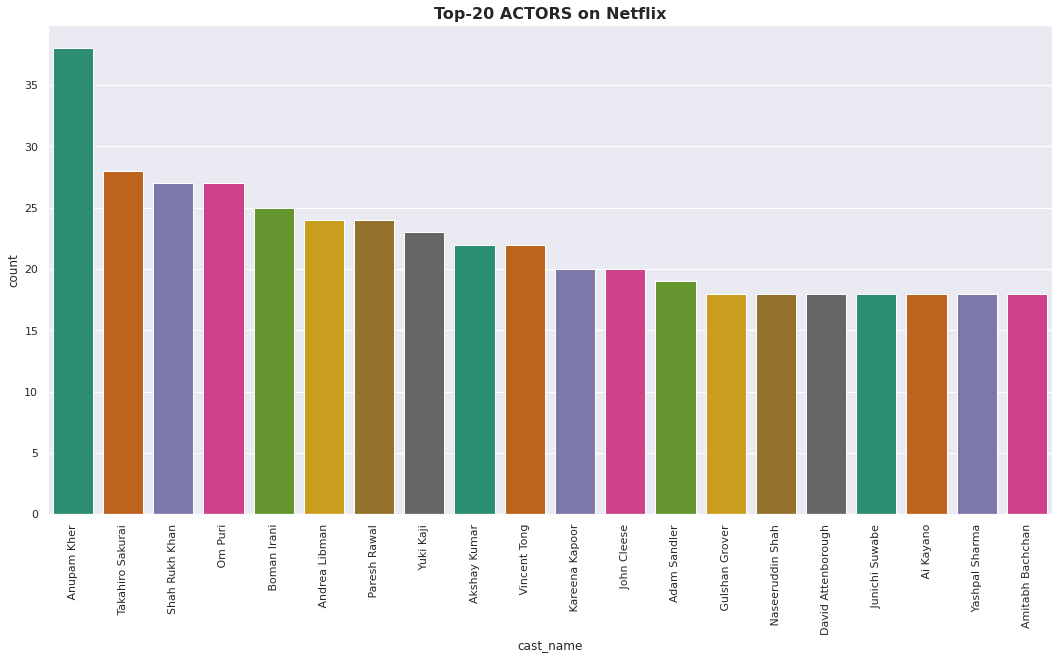

In [37]:
# Top 20 actors netflix
netflix['cast_name'] =netflix ['cast'].apply(lambda x :  x.split(',')) 
cast_count = []
for i in netflix['cast_name']: cast_count += i
cast_dict = dict((i, cast_count.count(i)) for i in cast_count)
df_cast_count = pd.DataFrame(cast_dict.values(),cast_dict.keys()).reset_index().sort_values(0,ascending=False).rename(
    columns = {'index' : 'cast_name', 0 : 'count'}).iloc[1:21]
plt.figure(figsize=(18,9))
sns.barplot(x='cast_name',y='count',data=df_cast_count,palette="Dark2")
plt.title("Top-20 ACTORS on Netflix",size='16',fontweight="bold")
plt.xticks(rotation=90)
plt.show()

In [38]:
#LONGEST TV - SHOWS
long_shows = netflix_shows[netflix_shows['duration']>9]
long_shows_data = long_shows[['title','duration']]
long_shows_data.sort_values(by=['duration'],ascending=False)

TypeError: ignored

###The top actor on Netflix Movies, based on the number of titles, is Anupam Kher

In [39]:
#showing top 5 rows data
netflix_movies["duration"].head()

1     93 min
2     78 min
3     80 min
4    123 min
6     95 min
Name: duration, dtype: object

In [40]:
#Duration
netflix_shows['duration']=netflix_shows['duration'].str.replace('Season','')
netflix_shows['duration']=netflix_shows['duration'].str.replace('s','')
netflix_movies['duration']=netflix_movies["duration"].str.replace('min','')

netflix_movies['duration']=netflix_movies['duration'].astype(str).astype(int)
netflix_shows['duration']=netflix_shows['duration'].astype(str).astype(int)
#netflix['duration']

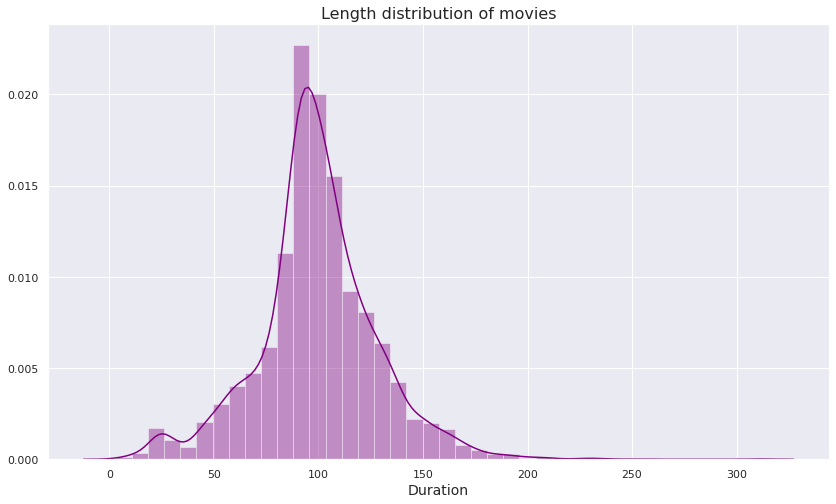

In [41]:
# Length distribution of movies
movie_data = netflix[netflix['type']=='Movie']

plt.figure(figsize=(14, 8))

sns.distplot(netflix_movies['duration'], bins=40,color='purple').set(ylabel=None)

plt.title('Length distribution of movies', fontsize=16)
plt.xlabel('Duration', fontsize=14)
plt.show()

In [42]:
# Season-wise distribution of tv shows
shows=netflix_shows['duration'].value_counts().T.reset_index()


fig = px.pie(shows,values='duration',names='index',color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_layout(title="season-wise distribution of tv shows")
fig.update_traces(textposition='inside', textinfo='percent+label', textfont_size=20,
                  marker=dict( line=dict(color='RebeccaPurple', width=2)))

###**LONGEST TV - SHOWS**

In [43]:
#LONGEST TV - SHOWS
long_shows = netflix_shows[netflix_shows['duration']>9]
long_shows_data = long_shows[['title','duration']]
long_shows_data.sort_values(by=['duration'],ascending=False)

,title,duration
2538,Grey's Anatomy,16
4438,NCIS,15
5912,Supernatural,15
1471,COMEDIANS of the world,13
1537,Criminal Minds,12
7169,Trailer Park Boys,12
1300,Cheers,11
2678,Heartland,11
1577,Dad's Army,10
1597,Danger Mouse: Classic Collection,10


#**DATA CLEANING AND PREPROCESSING**

In [44]:
#shows column
netflix.columns

Index(['show_id', 'type', 'title', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added', 'month_added', 'cast_name'],
      dtype='object')

In [45]:
#drop irrelevant column
netflix_movies.drop(columns=['show_id', 'title', 'cast', 'date_added',
          'description'],axis=1,inplace=True)

netflix_shows.drop(columns=['show_id', 'title', 'cast', 'date_added',
          'description'],axis=1,inplace=True)

new_netflix = netflix.drop(columns=['show_id', 'title', 'cast', 'date_added',
          'description'],axis=1)
netflix_movies

,type,country,release_year,rating,duration,listed_in,year_added,month_added
1,Movie,Mexico,2016,TV-MA,93,"Dramas, International Movies",2016,12
2,Movie,Singapore,2011,R,78,"Horror Movies, International Movies",2018,12
3,Movie,United States,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...",2017,11
4,Movie,United States,2008,PG-13,123,Dramas,2020,1
6,Movie,Egypt,2019,TV-MA,95,"Horror Movies, International Movies",2020,6
...,...,...,...,...,...,...,...,...
7781,Movie,United States,2006,PG,88,"Children & Family Movies, Comedies",2020,1
7782,Movie,"Sweden, Czech Republic, United Kingdom, Denmar...",2005,TV-MA,99,"Dramas, International Movies",2020,10
7783,Movie,India,2015,TV-14,111,"Dramas, International Movies, Music & Musicals",2019,3
7784,Movie,United States,2019,TV-MA,44,"Documentaries, International Movies, Music & M...",2020,9


In [46]:
#Shows top 5 rows
new_netflix.head()

,type,country,release_year,rating,duration,listed_in,year_added,month_added,cast_name
0,TV Show,Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",2020,8,"[João Miguel, Bianca Comparato, Michel Gomes..."
1,Movie,Mexico,2016,TV-MA,93 min,"Dramas, International Movies",2016,12,"[Demián Bichir, Héctor Bonilla, Oscar Serran..."
2,Movie,Singapore,2011,R,78 min,"Horror Movies, International Movies",2018,12,"[Tedd Chan, Stella Chung, Henley Hii, Lawre..."
3,Movie,United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",2017,11,"[Elijah Wood, John C. Reilly, Jennifer Conne..."
4,Movie,United States,2008,PG-13,123 min,Dramas,2020,1,"[Jim Sturgess, Kevin Spacey, Kate Bosworth, ..."


In [47]:
#Import Label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
new_netflix["type"] = le.fit_transform(new_netflix["type"])
new_netflix["country"] = le.fit_transform(new_netflix["country"])

new_netflix['rating'] = le.fit_transform(new_netflix['rating'])
new_netflix['listed_in'] = le.fit_transform(new_netflix['listed_in'])